In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered.zip'
zipref = zipfile.ZipFile(local_zip, 'r')
zipref.extractall('/content/drive/MyDrive/Colab Notebooks')

In [3]:
base_dir  = '/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir   = os.path.join(val_dir, 'cats')
val_dogs_dir   = os.path.join(val_dir, 'dogs')

print(train_cats_dir, train_dogs_dir, val_cats_dir, val_dogs_dir, sep = '\n')



/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/train/cats
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/train/dogs
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/validation/cats
/content/drive/MyDrive/Colab Notebooks/cats_and_dogs_filtered/validation/dogs


In [4]:
print('Number of training cat images   : ', len(os.listdir(train_cats_dir)))
print('Number of training dog images   : ', len(os.listdir(train_dogs_dir)))
print('Number of validation cat images : ', len(os.listdir(val_cats_dir)))
print('Number of validation dog images : ', len(os.listdir(val_dogs_dir)))

Number of training cat images   :  1000
Number of training dog images   :  1000
Number of validation cat images :  500
Number of validation dog images :  500


(-0.5, 348.5, 342.5, -0.5)

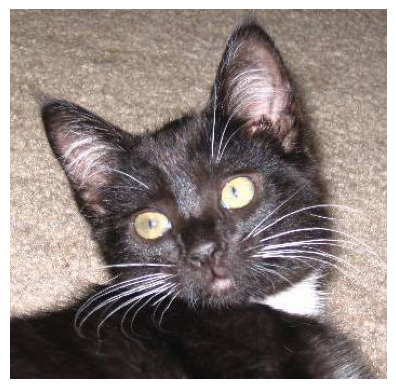

In [5]:
# Accessing and visualizing an image
cat_image_path = os.path.join(train_cats_dir, 'cat.102.jpg')
cat_image = mpimg.imread(cat_image_path)
#print(cat_image.shape)
plt.imshow(cat_image)
plt.axis('off')

(-0.5, 285.5, 247.5, -0.5)

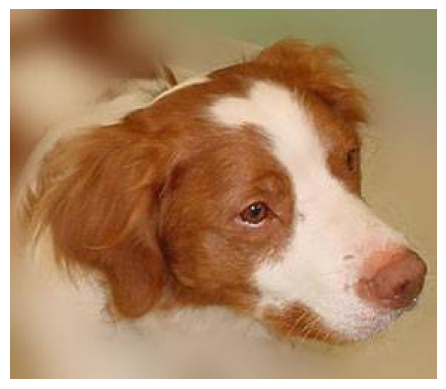

In [6]:
# Accessing and visualizing a dog image
dog_image_path = os.path.join(train_dogs_dir, 'dog.791.jpg')
dog_image = mpimg.imread(dog_image_path)
#print(cat_image.shape)
plt.imshow(dog_image)
plt.axis('off')

In [7]:
train_cat_images = os.listdir(train_cats_dir)[:30]
train_dog_images = os.listdir(train_dogs_dir)[:30]

cat_image_paths = [os.path.join(train_cats_dir, image) for image in train_cat_images]
dog_image_paths = [os.path.join(train_dogs_dir, image) for image in train_dog_images]

image_paths = cat_image_paths + dog_image_paths

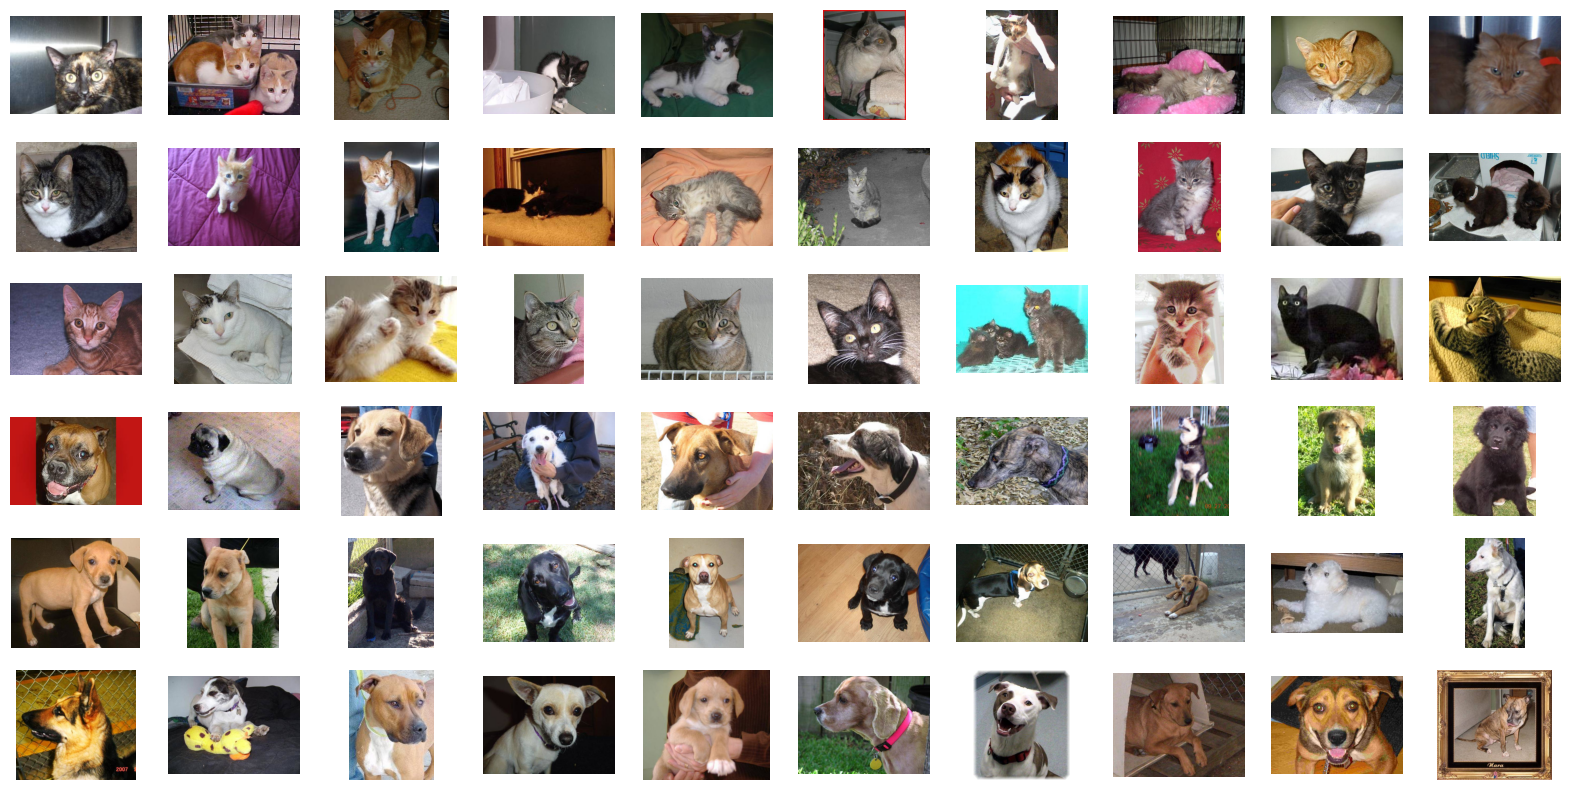

In [8]:
train_cat_images = os.listdir(train_cats_dir)[:30]
train_dog_images = os.listdir(train_dogs_dir)[:30]

cat_image_paths = [os.path.join(train_cats_dir, image) for image in train_cat_images]
dog_image_paths = [os.path.join(train_dogs_dir, image) for image in train_dog_images]

image_paths = cat_image_paths + dog_image_paths
plt.figure(figsize = (20,10))
for i in range(60):
  plt.subplot(6,10, i+1)
  plt.axis('off')
  image = mpimg.imread(image_paths[i])
  plt.imshow(image)

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 20,
    zoom_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

# flow_from_directory used when data is in secondary storage
train_generator = train_datagen.flow_from_directory(
    train_dir,                              # Training directory path
    target_size = (300,300),
    batch_size = 50,
    class_mode = 'binary'
)
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator = val_datagen.flow_from_directory(
    val_dir,                               # Validation Directory path
    target_size = (300,300),
    batch_size = 50,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# Convolution testing 1
# model = tf.keras.models.Sequential()
# model.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (300,300,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(64,(3,3), activation = 'relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(128,(3,3), activation = 'relu'))
# model.add(Conv2D(128,(3,3), activation = 'relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(256,(3,3), activation = 'relu'))
# model.add(Conv2D(256,(3,3), activation = 'relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(512,(3,3), activation = 'relu'))
# model.add(Conv2D(512,(3,3), activation = 'relu'))
# model.add(MaxPooling2D())

# model.add(Flatten())
# model.add(Dense(200, activation = 'relu'))
# model.add(Dense(100, activation = 'relu'))
# model.add(Dense(1, 'sigmoid'))

# model.summary(),

# Convolution testing 2
# model = tf.keras.models.Sequential()
# model = tf.keras.models.Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model.summary()


In [11]:
# Using transfer learning
vgg_model = tf.keras.applications.VGG19(
    include_top = False,
    input_shape = (300,300,3)
)
vgg_model.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                              

In [12]:
model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(),
              metrics = ['Accuracy'])

In [14]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 60,
    verbose = 1
)

Epoch 1/60
40/40 [==============================] - 402s 9s/step - loss: 4.7106 - Accuracy: 0.5045 - val_loss: 0.6932 - val_Accuracy: 0.5000
Epoch 2/60
40/40 [==============================] - 95s 2s/step - loss: 0.6972 - Accuracy: 0.4785 - val_loss: 0.6942 - val_Accuracy: 0.5000
Epoch 3/60
40/40 [==============================] - 95s 2s/step - loss: 0.6935 - Accuracy: 0.4770 - val_loss: 0.6932 - val_Accuracy: 0.5000
Epoch 4/60
40/40 [==============================] - 94s 2s/step - loss: 0.6934 - Accuracy: 0.5000 - val_loss: 0.6931 - val_Accuracy: 0.5000
Epoch 5/60
40/40 [==============================] - 95s 2s/step - loss: 0.6933 - Accuracy: 0.4920 - val_loss: 0.6932 - val_Accuracy: 0.5000
Epoch 6/60
40/40 [==============================] - 95s 2s/step - loss: 0.6932 - Accuracy: 0.4940 - val_loss: 0.6932 - val_Accuracy: 0.5000
Epoch 7/60
40/40 [==============================] - 104s 3s/step - loss: 0.6932 - Accuracy: 0.5000 - val_loss: 0.6931 - val_Accuracy: 0.5000
Epoch 8/60
40/40 [

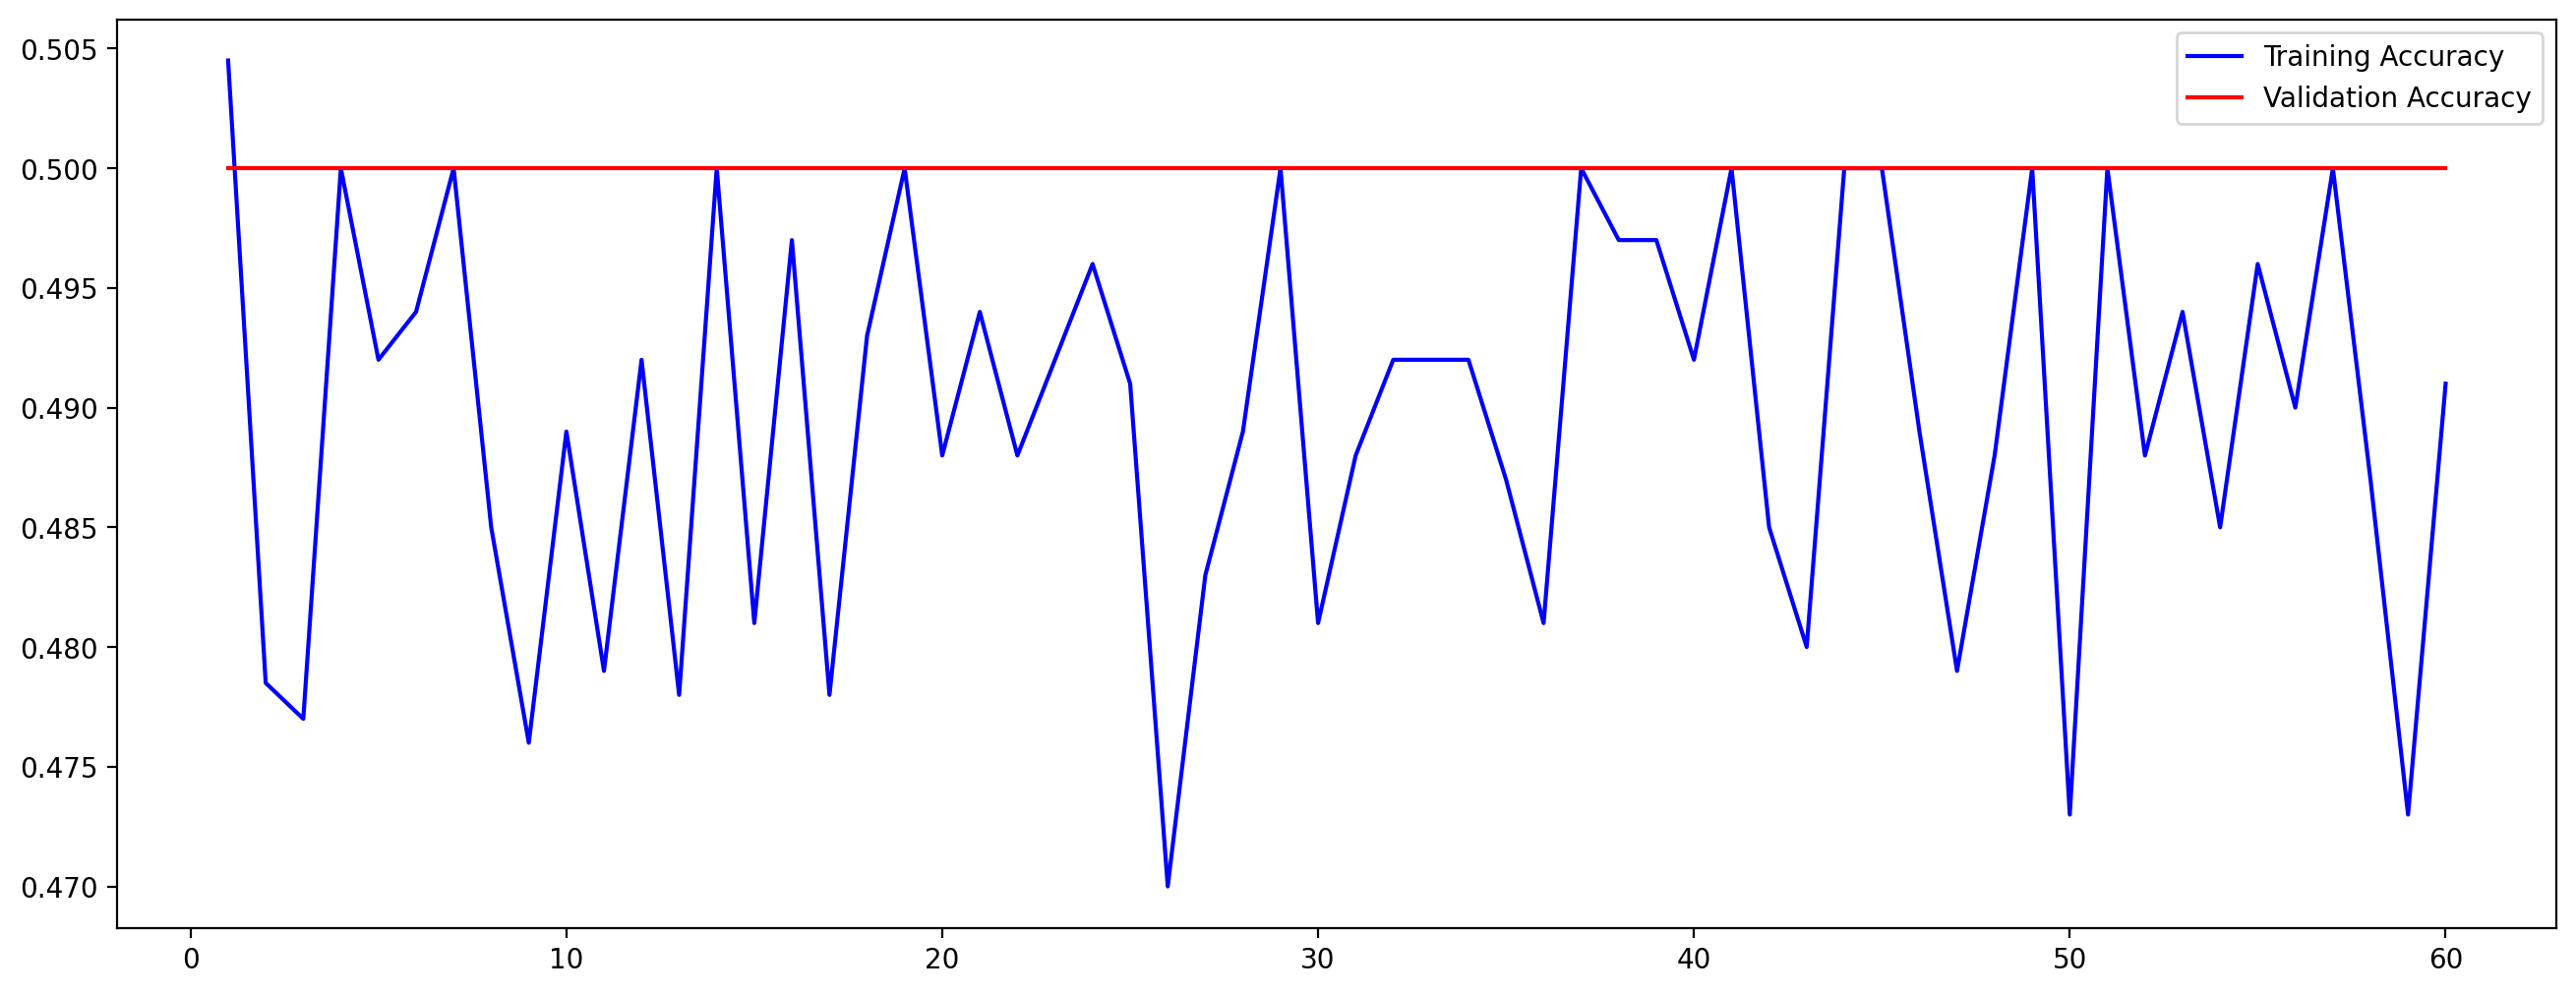

In [16]:
acc_train = history.history['Accuracy']
acc_val   = history.history['val_Accuracy']
num_epochs = range(1,61)


plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()